In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import os

2023-02-27 18:15:04.632597: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-27 18:15:05.096664: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-02-27 18:15:05.098054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 18:15:06.627207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#df = pd.read_csv('final_dataset22.csv')
#df
#tf.convert_to_tensor(df)

# Read Dataset

In [3]:

fname = 'final_dataset22'

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
lines.pop()

header = lines[0].split(",")
lines = lines[1:]

print(header)
print(len(lines))




['', 'Unnamed: 0', 'datetime', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore', 'ao', 'kama', 'ppo', 'pvo', 'roc', 'rsi', 'stochrsi', 'stoch', 'tsi', 'uo', 'wri', 'accdist', 'cmf', 'emv', 'fi', 'mfi', 'nvi', 'obv', 'smaemv', 'vpt', 'vwap', 'atr', 'ulcer', 'bbh', 'bbl', 'bbhi', 'bbli', 'bbmavg', 'bb_pb', 'bb_wb', 'dchb', 'dclb', 'dcmb', 'dcpb', 'dcwb', 'kchb', 'kclb', 'kchbi', 'kclbi', 'kcmb', 'kcpb', 'kcwb', 'adx', 'adx_neg', 'adx_pos', 'aroon_up', 'aroon_down', 'cci', 'dpo', 'kst', 'kst_sig', 'ema', 'ichimoku_a', 'ichimoku_b', 'ichimoku_base_line', 'ichimoku_conversion_line', 'macd', 'macd_diff', 'macd_signal', 'mi', 'sma', 'wma', 'stc', 'trix', 'psar_down_indicator', 'psar_up_indicator', 'vi_pos', 'vi_neg', 'ALU', 'WHEAT', 'XCU', 'BRENTOIL', 'COFFEE', 'SOYBEAN', 'NG', 'NI', 'RICE', 'XAU', 'IRD', 'SUGAR', 'ETHANOL', 'CORN', 'COTTON', 'TIN', 'ZNC']
525530


In [4]:
close = np.zeros( (len(lines),1) )
raw_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    #print(values)
    close[i] = values[5]
    raw_data[i, :] = values[:]
        


In [7]:
close

array([[47271.88],
       [47289.97],
       [47300.72],
       ...,
       [16519.37],
       [16521.85],
       [16521.38]])

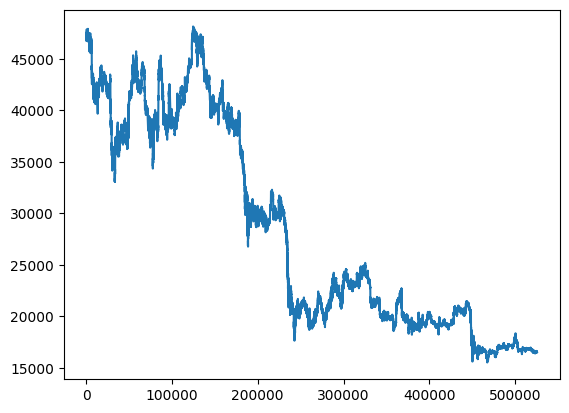

In [5]:
plt.plot(range(len(close)), close)

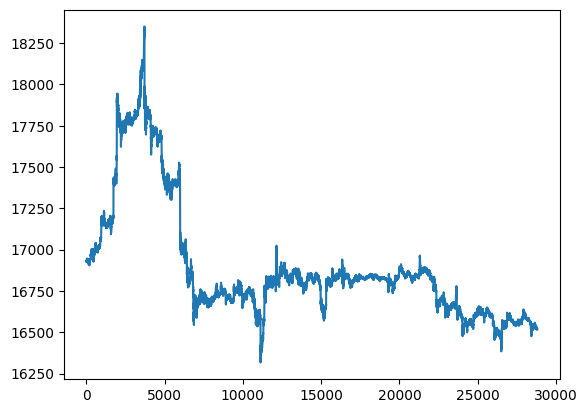

In [6]:
# print last x days
days = 20
x = days * 24 * 60
close[:-x].shape
plt.plot(range(x), close[-x:])

# Prepare Datasets

In [7]:
num_train_samples = int(0.5 * len(raw_data))  # Train
num_val_samples = int(0.25 * len(raw_data))   # Validation
num_test_samples = len(raw_data) - num_train_samples - num_val_samples  # Test
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 262765
num_val_samples: 131382
num_test_samples: 131383


In [8]:

# hours to be taken account in the past for sequence_lenght 
hours = 96
hours_delay = 12

sampling_rate = 1
sequence_length = hours * 60
delay = sampling_rate * (sequence_length + (hours_delay*60) - 1)
batch_size = 256

train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_length=sequence_length,
                    shuffle=True, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_length=sequence_length,
                    shuffle=True,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_length=sequence_length,
                    shuffle=True,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

In [ ]:
i =0
for samples, targets in train_dataset:
    i=i+1
    # print("samples_shape:", samples.shape)
    # print("targets shape:", targets.shape)
    # break
    
print(i)

2023-02-27 18:16:17.547745: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [257006]
	 [[{{node Placeholder/_28}}]]
2023-02-27 18:16:17.548411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [262765,1]
	 [[{{node Placeholder/_20}}]]


# First ML Model

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("cryptocurrency-market-prediction-project/data-analysis", save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,epochs=10,validation_data=val_dataset,callbacks=callbacks)

model = keras.models.load_model("cryptocurrency-market-prediction-project/data-analysis")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
   2/1004 [..............................] - ETA: 19:34 - loss: 37256235083005287202816.0000 - mae: 193015447552.0000

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# First LSTM